# Analisis de atributos

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = [10, 10]

In [2]:
data = pd.read_csv('../data/formatted_data.csv')
data = data.drop(['Unnamed: 0', 'id'], axis=1)

In [3]:
data.head()

,coordinates_x,coordinates_y,bus_code,line,time_stamp
0,-55.995388,-34.86011,252,863,2018-10-02T17:07:12
1,-55.995388,-34.86011,252,863,2018-10-02T17:07:27
2,-55.995388,-34.86011,252,863,2018-10-02T17:07:42
3,-55.995388,-34.86011,252,863,2018-10-02T17:07:57
4,-55.995388,-34.86011,252,863,2018-10-02T17:08:12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63939 entries, 0 to 63938
Data columns (total 5 columns):
coordinates_x    63939 non-null float64
coordinates_y    63939 non-null float64
bus_code         63939 non-null int64
line             63939 non-null int64
time_stamp       63939 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 2.4+ MB


In [5]:
data.time_stamp = data.time_stamp.apply(lambda t: datetime.strptime(t,'%Y-%m-%dT%H:%M:%S'))

In [6]:
data.head()

,coordinates_x,coordinates_y,bus_code,line,time_stamp
0,-55.995388,-34.86011,252,863,2018-10-02 17:07:12
1,-55.995388,-34.86011,252,863,2018-10-02 17:07:27
2,-55.995388,-34.86011,252,863,2018-10-02 17:07:42
3,-55.995388,-34.86011,252,863,2018-10-02 17:07:57
4,-55.995388,-34.86011,252,863,2018-10-02 17:08:12


In [7]:
buses = data.bus_code
unique_buses = np.unique(buses)
del buses
unique_buses

array([   2,    3,    4,    5,    6,    9,   10,   11,   13,   14,   15,
         16,   17,   20,   22,   23,   24,   26,   27,   28,   29,   30,
         33,   34,   35,   37,   40,   43,   45,   46,   47,   50,   52,
         53,   54,   56,   57,   58,   59,   62,   64,   65,   67,   68,
         69,   72,   73,   74,   75,   76,   77,   78,   79,   80,   82,
         83,   86,   87,   88,   89,   90,   91,   92,   94,   96,   98,
         99,  101,  102,  103,  105,  108,  110,  114,  121,  130,  131,
        138,  151,  174,  175,  224,  241,  248,  249,  250,  252,  258,
        261,  262,  267,  269,  273,  275,  276,  278,  285,  288,  290,
        301,  495,  525,  536,  545,  551,  562,  565,  570,  589,  590,
        614,  623,  637,  654,  666,  670,  678,  702,  709,  710,  713,
        715,  722,  723,  737,  750,  756,  757,  776,  779,  784,  787,
        810,  813,  907,  915,  917,  918,  919,  920,  932,  937,  944,
        946,  950,  956,  957,  961,  962,  963,  9

In [8]:
def bus_moving(df_t0, df_t1):
    if(df_t0.bus_code == df_t1.bus_code):
        return different_coordinates(df_t0, df_t1)
    return None

def is_different_bus(df_t0, df_t1):
    if(df_t0.bus_code == df_t1.bus_code):
        return False
    return True

def different_coordinates(df_t0, df_t1):
    d0 = df_t0.coordinates_x - df_t1.coordinates_x
    d1 = df_t0.coordinates_y - df_t1.coordinates_y
    if d0 == 0 and d1 ==0:
        return False
    return True

In [9]:
new_data = pd.DataFrame()
OO = []
for bus in unique_buses:
    bus_data = pd.DataFrame(data[data.bus_code == bus])
    row_cache = data.iloc[0]
    buses = defaultdict(list)
    moving = []
    row_cache = bus_data.iloc[0]
    for index, row in bus_data.iterrows():
        is_moving = bus_moving(row_cache, row)
        if is_moving:
            moving.append(str(row.time_stamp)+'#'+str(row_cache.time_stamp))
        else:
            moving.append('-')
        row_cache = row
    bus_data['time'] = moving
    bus_data = bus_data[bus_data.coordinates_x != 0]
    OO.append([bus_data.coordinates_x,bus_data.coordinates_y])
#     plt.xticks(rotation=90)

In [ ]:
noop = 3
for bus in OO:
    if noop == 0:
        break
    ax = sns.pointplot(x=bus[0], y=bus[1],color='r')

344


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

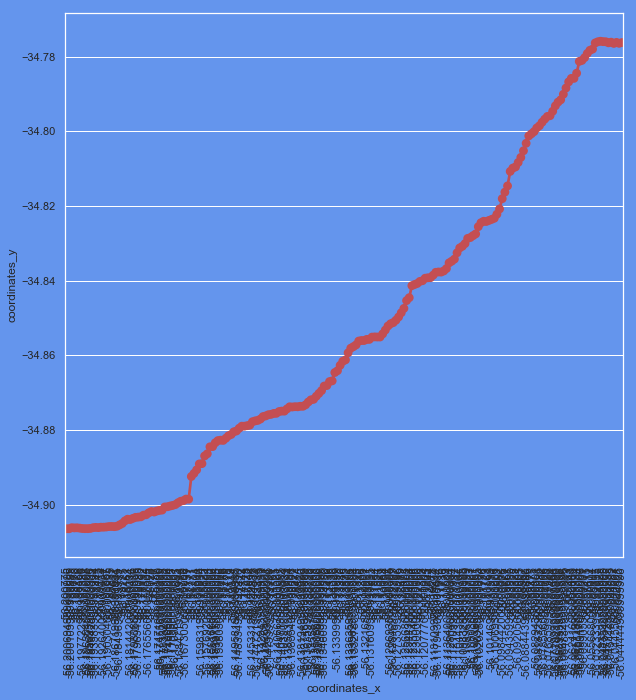

In [178]:
print(len(bus_data))
bus_data = bus_data[bus_data.coordinates_x != 0]
ax = sns.pointplot(x="coordinates_x", y="coordinates_y", data=bus_data, color='r')
plt.xticks(rotation=90)

In [122]:
row_cache = data.iloc[0]
buses = defaultdict(list)

for index, row in data.iterrows():
    if is_different_bus(row_cache, row):
        buses[row.bus_code] = [row]
    else:
        buses[row.bus_code].append(row)
    row_cache = row

In [125]:
buses[10]

[coordinates_x               -56.2242
 coordinates_y               -34.8564
 bus_code                          10
 line                             218
 time_stamp       2018-10-02 17:10:12
 id                                10
 Name: 61370, dtype: object]

In [95]:
df_t0 = data.iloc[0]
df_t1 = data.iloc[1]
bus_not_moving(df_t0,df_t1)

True

In [97]:
row_cache = data.iloc[0]
for index, row in data.iterrows():
    is_moving = bus_moving(row_cache, row)
    if is_moving == None:
        moving.append('+')
    elif is_moving:
        moving.append(str(row.time_stamp)+'#'+str(row_cache.time_stamp))
    else:
        moving.append('-')
    row_cache = row
data['time'] = moving

In [98]:
data.head(50)

,coordinates_x,coordinates_y,bus_code,line,time_stamp,id,time
0,-55.995388,-34.86011,252,863,2018-10-02 17:07:12,252,-
1,-55.995388,-34.86011,252,863,2018-10-02 17:07:27,252,-
2,-55.995388,-34.86011,252,863,2018-10-02 17:07:42,252,-
3,-55.995388,-34.86011,252,863,2018-10-02 17:07:57,252,-
4,-55.995388,-34.86011,252,863,2018-10-02 17:08:12,252,-
5,-55.995388,-34.86011,252,863,2018-10-02 17:08:27,252,-
6,-55.995388,-34.86011,252,863,2018-10-02 17:08:42,252,-
7,-55.995388,-34.86011,252,863,2018-10-02 17:08:57,252,-
8,-55.995388,-34.86011,252,863,2018-10-02 17:09:12,252,-
9,-55.995388,-34.86011,252,863,2018-10-02 17:09:27,252,-
